# The Data Mining Process (Based on CRISPDM)
* ** Business Objectives **
* ** Data Understanding (EDA)**
* ** Data Preparation **
* ** Modeling **
* ** Model Evaluation & Selection **
* ** Deployment **

Import the relevant python packages and load the dataset from standard datasets provided by scikit-learn package.

In [1]:
import sklearn.datasets as dt
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import pandas.tseries
import warnings


%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)

boston = dt.load_boston()

# for key in boston.keys(): print("Key:", key, ">>  Data Type:", type(boston[key]))
# print(type(boston))

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Data Understanding (Exploratory Data Analysis)
* Review the dataset to understand the structure and format of the data available for modelling

In [2]:
# Load the data from scikit-learn dataset Bunch object into a pandas DataFrame 
# print(type(boston))
df_boston = pd.DataFrame(boston.data, index=np.arange(506), columns=boston.feature_names)  
df_boston["Bk"] = np.sqrt(df_boston["B"] / 1000) + 0.63
df_boston["MEDV"] = pd.Series(boston.target, index=np.arange(506))

sns.set_style("darkgrid")

print(df_boston.shape)
print("=================================================================")
print(df_boston.head())

(506, 15)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT        Bk  MEDV  
0     15.3  396.90   4.98  1.260000  24.0  
1     17.8  396.90   9.14  1.260000  21.6  
2     17.8  392.83   4.03  1.256762  34.7  
3     18.7  394.63   2.94  1.258196  33.4  
4     18.7  396.90   5.33  1.260000  36.2  


* To enhance understanding of the data, graphs and plots provide a visual aid.

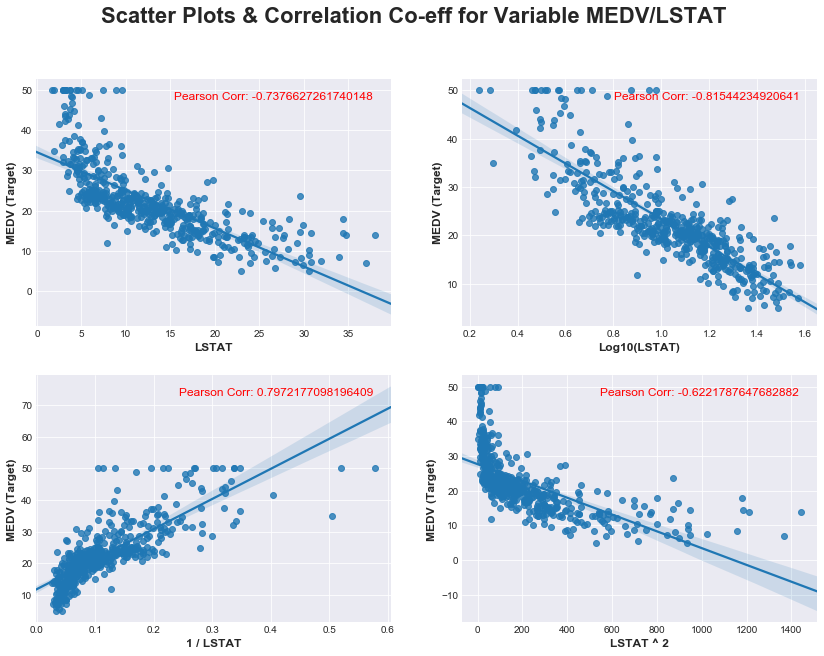

0

In [3]:
def plotVariable(x, y, df):
    plt.subplot(221)
    p1 = sns.regplot(df[x], df[y])
    plt.xlabel(x, fontsize=12, fontweight='bold')
    plt.ylabel("MEDV (Target)", fontsize=12, fontweight='bold')
    p1.text(0.95, 0.95, 'Pearson Corr: ' + str(np.corrcoef(df[x], df[y])[0, 1]), verticalalignment='top', horizontalalignment='right',
        transform=p1.transAxes, color='red', fontsize=12)

    plt.subplot(222)
    p2 = sns.regplot(np.log10(df[x]), df[y])
    plt.xlabel("Log10(" + x + ")", fontsize=12, fontweight='bold')
    plt.ylabel("MEDV (Target)", fontsize=12, fontweight='bold')
    p2.text(0.95, 0.95, 'Pearson Corr: ' + str(np.corrcoef(np.log10(df[x]), df[y])[0, 1]), verticalalignment='top', horizontalalignment='right',
        transform=p2.transAxes, color='red', fontsize=12)

    plt.subplot(223)
    p3 = sns.regplot(np.reciprocal(df[x]), df[y])
    plt.xlabel("1 / " + x, fontsize=12, fontweight='bold')
    plt.ylabel("MEDV (Target)", fontsize=12, fontweight='bold')
    p3.text(0.95, 0.95, 'Pearson Corr: ' + str(np.corrcoef(np.reciprocal(df[x]), df[y])[0, 1]), verticalalignment='top', horizontalalignment='right',
        transform=p3.transAxes, color='red', fontsize=12)

    plt.subplot(224)
    p4 = sns.regplot(np.power(df[x], 2), df[y])
    plt.xlabel(x + " ^ 2", fontsize=12, fontweight='bold')
    plt.ylabel("MEDV (Target)", fontsize=12, fontweight='bold')
    p4.text(0.95, 0.95, 'Pearson Corr: ' + str(np.corrcoef(np.power(df[x], 2), df[y])[0, 1]), verticalalignment='top', horizontalalignment='right',
        transform=p4.transAxes, color='red', fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(14, 10)
    #fig.set_tight_layout(tight=True)
    fig.suptitle("Scatter Plots & Correlation Co-eff for Variable MEDV/" + x, fontsize=22, fontweight='bold')

    plt.show()
    
    return 0

# Execute this call for the input variables in dataset. plotVariable(input, target, dataframe)
plotVariable("LSTAT", "MEDV", df_boston) 

In [4]:
# Helper function to summarize important characteristics of variables in a dataset
def summarize(data): 
    '''
        Method to summarize important characteristics of the continuous variables in a DataFrame
        
        data: DataFrame containing the variables to be summarized
    '''
    col_count = 0
    cols_df = pd.DataFrame({"A": 0}, index=np.array([0]))
    for cols in data.columns:
        col_type = str(data[cols].dtype)
        if col_count == 0:  
            cols_df = pd.DataFrame({"VAR_NAME": cols, "TYPE": data[cols].dtype, "CORR_TARGET": np.corrcoef(data[cols], data["MEDV"])[0][1], "MEAN": np.mean(data[cols]), "SKEW": data[cols].skew(), "KURT": data[cols].kurt(), "MIN": np.min(data[cols]), "MAX": np.max(data[cols]), "STDEV": np.std(data[cols]), "COUNT":  len(data[cols]), "MISSING": np.sum(pd.isnull(data[cols])), "TMIN": np.mean(data[cols]) - (3 * np.std(data[cols])), "TMAX": np.mean(data[cols]) + (3 * np.std(data[cols]))}, index=np.array([col_count]))
        else:
            cols_df = cols_df.append(pd.DataFrame({"VAR_NAME": cols, "TYPE": data[cols].dtype, "CORR_TARGET": np.corrcoef(data[cols], data["MEDV"])[0][1], "MEAN": np.mean(data[cols]), "SKEW": data[cols].skew(), "KURT": data[cols].kurt(), "MIN": np.min(data[cols]), "MAX": np.max(data[cols]), "STDEV": np.std(data[cols]), "COUNT":  len(data[cols]), "MISSING": np.sum(pd.isnull(data[cols])), "TMIN": np.mean(data[cols]) - (3 * np.std(data[cols])), "TMAX": np.mean(data[cols]) + (3 * np.std(data[cols]))}, index=np.array([col_count])))
        col_count += 1
    cols_df = cols_df[["VAR_NAME", "TYPE", "COUNT", "MISSING", "CORR_TARGET", "MEAN", "STDEV", "MIN", "MAX", "SKEW", "KURT", "TMIN", "TMAX"]]
    return cols_df

def summarize_cat(data):
    col_count = 0
    cols_df = pd.DataFrame({"A": 0}, index=np.array([0]))
    for cols in data.columns:
        col_type = str(data[cols].dtype)
        if col_count == 0: 
            continue
    return cols_df        

In [5]:
def r_squared_adj(r_squared, n, k):
    '''
        Method that computes the Adjusted R-Squared value of a regression model based on the R-Squared value.
        
        r_squared: The coefficient of determination 
        n: The total number of records in the sample
        k: The total number of predictors in the sample
    '''
    val = 1 - ((1 - r_squared) * ((n - 1) / (n - k - 1)))
    return val

## Data Preparation
* The tasks to be executed will be determined exploratory data analysis
* The actual transformation tasks are executed below:

In [6]:
# Functions for cleansing and transformations
df_boston_regr = (df_boston
                        .assign(CRIM=lambda x: np.log10(x['CRIM']),
                                INDUS=lambda x: np.log10(x['INDUS']),
                                LSTAT=lambda x: np.log10(x['LSTAT']),
                                DIS=lambda x: np.reciprocal(x['DIS']),
                                CHAS=lambda x: pd.Categorical(x['CHAS'].astype(int)))
                 )

# print(pd.crosstab(df_boston_regr.CHAS, columns="Count"))
# print(df_boston_regr.describe())

## Modeling
* First we build baseline model that is based on data in it's untransformed state. The resulting model will serve as a  baseline for comparison with other models.
* Next we build a model using the sample machine learing algorithm using the transformed data. Compare this model with the baseline to see the effect of transformations.

### Linear Regression Models
* Build the baseline Linear Regression model. Use the dataset without the transformations (df_boston)

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split into input (X) and target (y) variables
X = df_boston[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]]
y = df_boston["MEDV"].values

# Split data into train & test samples train 80% while test 20%
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the training data to reduce the effect of larger valued variables on smaller ones
scalerX = StandardScaler().fit(X_train)
Stan_X = pd.DataFrame(scalerX.transform(X_train), index=X_train.index, columns=X_train.columns)
scalerY = StandardScaler().fit(y_train.reshape(y_train.shape[0], 1))
Stan_y = scalerY.transform(y_train.reshape(y_train.shape[0], 1))

# Create regression estimator and set hyper-parameters
lin_reg = LinearRegression(fit_intercept = True, normalize = False)

# Create the rfe object to recursively select best features by leveraging cross-validation 
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
rfecv = RFECV(estimator=lin_reg, step=1, cv=kfold)
rfecv.fit(X, y)

# Review the optimal features selected by the recursive elimination process
print("\n#----------------------------- Results of the Recursive Feature Elimination Process------------------------#")
print("Optimal number of features: %d" % rfecv.n_features_)
print("List of optimal features: ", X.columns[rfecv.support_])
print("Assigned score of optimal features: ", rfecv.grid_scores_)

# Select columns based on recursive feature extraction to be use for linear regression model
cols = X.columns[rfecv.support_]

# Build a model with the optimal columns selected earlier
reg_model_a = lin_reg.fit(Stan_X[cols], Stan_y)
print("\n#----------------------- Results of Model A - Developed with 6 Top Features from RFE ----------------------#")
print("Regression coefficients of Model A: ", reg_model_a.coef_)
print("Intercept coefficient of Model A: ", reg_model_a.intercept_)
print("Rank of Model A: ", reg_model_a.rank_)
print("R^2 Model A: ", reg_model_a.score(Stan_X[cols], Stan_y))
print("R^2 Adj. Model A: ", r_squared_adj(reg_model_a.score(Stan_X[cols], Stan_y), len(y), len(cols)))

# Build a model with the optimal columns selected earlier
reg_model_b = lin_reg.fit(Stan_X, Stan_y)
print("\n#--------------------- Results of Model B - Developed with all 13 Features in Dataset ---------------------#")
print("Regression coefficients of Model B: ", reg_model_b.coef_)
print("Intercept coefficient of Model B: ", reg_model_b.intercept_)
print("Rank of Model B: ", reg_model_b.rank_)
print("R^2 Model B: ", reg_model_b.score(Stan_X, Stan_y))
print("R^2 Adj. Model B: ", r_squared_adj(reg_model_b.score(Stan_X, Stan_y), len(y), len(X.columns)))

# Scale the hold-out sample to be used for testing using the same scaler used on the training data
Stan_X_valid = pd.DataFrame(scalerX.transform(X_valid), index=X_valid.index, columns=X_valid.columns)
Stan_y_valid = scalerY.transform(y_valid.reshape(y_valid.shape[0], 1))

print("\n#------------------ Results of Selected Model B on Previously Unseen Data (Test Dataset) ------------------#")
print("R^2 Model B (Validation): ", reg_model_b.score(Stan_X_valid, Stan_y_valid))
print("R^2 Adj. Model B (Validation): ", r_squared_adj(reg_model_b.score(Stan_X_valid, Stan_y_valid), len(y), len(X.columns)))


#----------------------------- Results of the Recursive Feature Elimination Process------------------------#
Optimal number of features: 6
List of optimal features:  Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Assigned score of optimal features:  [-0.31637681 -0.08962896  0.17159141  0.29433175  0.39615242  0.50135307
  0.43547489  0.36364582  0.3529999   0.36032063  0.38418399  0.38774601
  0.39903343]

#----------------------- Results of Model A - Developed with 6 Top Features from RFE ----------------------#
Regression coefficients of Model A:  [[ 0.09705016 -0.24698783  0.33971453 -0.27245457 -0.22951849 -0.42696662]]
Intercept coefficient of Model A:  [4.31040347e-16]
Rank of Model A:  6
R^2 Model A:  0.7257314647320705
R^2 Adj. Model A:  0.7224336466727367

#--------------------- Results of Model B - Developed with all 13 Features in Dataset ---------------------#
Regression coefficients of Model B:  [[-0.10688508  0.07462915  0.03009218  0.07717747 -

* Build the first iteration Linear Regression model. Use the dataset that has been transformed (df_boston_regr)

In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split into input (X) and target (y) variables
X = df_boston_regr[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]]
y = df_boston_regr["MEDV"].values

# Split data into train & test samples
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the training data to reduce the effect of larger valued variables on smaller ones
scalerX = StandardScaler().fit(X_train)
Stan_X = pd.DataFrame(scalerX.transform(X_train), index=X_train.index, columns=X_train.columns)
scalerY = StandardScaler().fit(y_train.reshape(y_train.shape[0], 1))
Stan_y = scalerY.transform(y_train.reshape(y_train.shape[0], 1))

# Create regression estimator and set hyper-parameters
lin_reg = LinearRegression(fit_intercept = True, normalize = False)

# Create the rfe object to recursively select best features by leveraging cross-validation 
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
rfecv = RFECV(estimator=lin_reg, step=1, cv=kfold)
rfecv.fit(X, y)

# Review the optimal features selected by the recursive elimination process
print("\n#----------------------------- Results of the Recursive Feature Elimination Process------------------------#")
print("Optimal number of features: %d" % rfecv.n_features_)
print("List of optimal features: ", X.columns[rfecv.support_])
print("Assigned score of optimal features: ", rfecv.grid_scores_)

# Select columns based on recursive feature extraction to be use for linear regression model
cols = X.columns[rfecv.support_]

# Build a model with the optimal columns selected earlier
reg_model_a = lin_reg.fit(Stan_X[cols], Stan_y)
print("\n#----------------------- Results of Model A - Developed with 7 Top Features from RFE ----------------------#")
print("Regression coefficients of Model A: ", reg_model_a.coef_)
print("Intercept coefficient of Model A: ", reg_model_a.intercept_)
print("Rank of Model A: ", reg_model_a.rank_)
print("R^2 Model A: ", reg_model_a.score(Stan_X[cols], Stan_y))
print("R^2 Adj. Model A: ", r_squared_adj(reg_model_a.score(Stan_X[cols], Stan_y), len(y), len(cols)))

# Build a model with the optimal columns selected earlier
reg_model_b = lin_reg.fit(Stan_X, Stan_y)
print("\n#--------------------- Results of Model B - Developed with all 13 Features in Dataset ---------------------#")
print("Regression coefficients of Model B: ", reg_model_b.coef_)
print("Intercept coefficient of Model B: ", reg_model_b.intercept_)
print("Rank of Model B: ", reg_model_b.rank_)
print("R^2 Model B: ", reg_model_b.score(Stan_X, Stan_y))
print("R^2 Adj. Model B: ", r_squared_adj(reg_model_b.score(Stan_X, Stan_y), len(y), len(X.columns)))

# Scale the hold-out sample to be used for testing using the same scaler used on the training data
Stan_X_valid = pd.DataFrame(scalerX.transform(X_valid), index=X_valid.index, columns=X_valid.columns)
Stan_y_valid = scalerY.transform(y_valid.reshape(y_valid.shape[0], 1))

#print("\n#------------------ Results of Selected Model A on Previously Unseen Data (Test Dataset) ------------------#")
#print("R^2 Model A (Validation): ", reg_model_a.score(Stan_X_valid[cols], Stan_y_valid))
#print("R^2 Adj. Model A (Validation): ", r_squared_adj(reg_model_a.score(Stan_X_valid[cols], Stan_y_valid), len(y), len(cols)))

print("\n#------------------ Results of Selected Model B on Previously Unseen Data (Test Dataset) ------------------#")
print("R^2 Model B (Validation): ", reg_model_b.score(Stan_X_valid, Stan_y_valid))
print("R^2 Adj. Model B (Validation): ", r_squared_adj(reg_model_b.score(Stan_X_valid, Stan_y_valid), len(y), len(X.columns)))


#----------------------------- Results of the Recursive Feature Elimination Process------------------------#
Optimal number of features: 7
List of optimal features:  Index(['INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
Assigned score of optimal features:  [0.48485066 0.46812572 0.48224873 0.41364144 0.47495574 0.54790255
 0.56882402 0.56086039 0.5165455  0.51202613 0.48903929 0.49873405
 0.51666895]

#----------------------- Results of Model A - Developed with 7 Top Features from RFE ----------------------#
Regression coefficients of Model A:  [[-0.03662214  0.0840218  -0.23995846  0.27402621  0.33364548 -0.17383348
  -0.56723011]]
Intercept coefficient of Model A:  [5.39061964e-16]
Rank of Model A:  7
R^2 Model A:  0.7787119791619235
R^2 Adj. Model A:  0.7756015049734365

#--------------------- Results of Model B - Developed with all 13 Features in Dataset ---------------------#
Regression coefficients of Model B:  [[-0.01729677 -0.07573965 -0.04011547  0.

### Decision Tree Regression Models
* Apply the DecisionTreeRegressor object in the scikit-learn package to build models using the dataset above.
* Build two models like we did for Linear Regression above. Baseline & First Iteration models.

# Modelling
Baseline with Tree Regression Model


In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X=df_boston[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM","AGE", "DIS","RAD", "TAX", "PTRATIO", "LSTAT","B" ]] #to get better result remove "AGE"
y = df_boston["MEDV"].values

steps = [('scaler',StandardScaler()),
         ('DecisionTreeRegressor',DecisionTreeRegressor())]


pipeline=Pipeline(steps)

parameters = {'DecisionTreeRegressor__max_depth':np.arange(1,9),
             'DecisionTreeRegressor__min_samples_split':np.arange(2,10),
             'DecisionTreeRegressor__min_samples_leaf':np.arange(1,5)}

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
gm_cv = GridSearchCV(pipeline,parameters,cv=4)

gm_cv.fit(X_train,y_train)
######################################################################################
#pipeline.fit(X_train,y_train)
#r2 =pipeline.score(X_test, y_test)
r2=gm_cv.score(X_train,y_train)
r2_t=gm_cv.score(X_test, y_test)
###################################################################################
DecisionTreeRegressor=DecisionTreeRegressor(max_depth=8)
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
rfecv = RFECV(estimator=DecisionTreeRegressor, step=1, cv=kfold)
rfecv.fit(X_train, y_train)
cols = X.columns[rfecv.support_]
reg_model_a =DecisionTreeRegressor.fit(X_train[cols], y_train)

#######################################################################################
r2_rfecv=reg_model_a.score(X_train[cols],y_train)
r2_rfecv_t=reg_model_a.score(X_test[cols], y_test)

print("\n#-------------------- Results of DecisionTreeRegressor model - Developed with all 13 Features in Dataset -------------------#")
print("\nTuned DecisionTreeRegressor R squared on training data: {}".format(r2))
print("R^2 Adj. Model on training data : ", r_squared_adj(r2 , len(y), 13))
print("Parameters of training data : ", gm_cv.best_estimator_)
print("********************************************************************************")
print("Tuned DecisionTreeRegressor R squared on testing data: {}".format(r2_t))
print("R^2 Adj. Model on testing data : ", r_squared_adj(r2_t , len(y), 13))

print("\n\n#----------------------------- Results of the Recursive Feature Elimination Process------------------------#")
print("\nOptimal number of features: %d" % rfecv.n_features_)
print("List of optimal features: ", X.columns[rfecv.support_])
print("Assigned score of optimal features: ", rfecv.grid_scores_)
print("\n\n#--------------------- Results of DecisionTreeRegressor Model - Developed with 10 Top Features from RFE --------------------#")
print("\nDecisionTreeRegressor R squared on training data_rfecv: {}".format(r2_rfecv))
print("R^2 Adj. Model on training data_rfecv : ", r_squared_adj(r2_rfecv , len(y), 13))
print("********************************************************************************")
print("DecisionTreeRegressor R squared on testing data_rfecv: {}".format(r2_rfecv_t))
print("R^2 Adj. Model on testing data_rfecv : ", r_squared_adj(r2_rfecv_t , len(y), 13))


#-------------------- Results of DecisionTreeRegressor model - Developed with all 13 Features in Dataset -------------------#

Tuned DecisionTreeRegressor R squared on training data: 0.9187021181746381
R^2 Adj. Model on training data :  0.9165540034109598
Parameters of training data :  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DecisionTreeRegressor', DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])
********************************************************************************
Tuned DecisionTreeRegressor R squared on testing data: 0.865524160124324
R^2 Adj. Model on testing data :  0.8619709367129749


#----------------------------- Results of the Recursive Feat

# First Iteration using transformed data df_boston_regr

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split into input (X) and target (y) variables
X = df_boston_regr[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]]
y = df_boston_regr["MEDV"].values

# Split data into train & test samples
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the training data to reduce the effect of larger valued variables on smaller ones
scalerX = StandardScaler().fit(X_train)
Stan_X = pd.DataFrame(scalerX.transform(X_train), index=X_train.index, columns=X_train.columns)
scalerY = StandardScaler().fit(y_train.reshape(y_train.shape[0], 1))
Stan_y = scalerY.transform(y_train.reshape(y_train.shape[0], 1))

# Create regression estimator and set hyper-parameters
DecisionTreeRegressor = DecisionTreeRegressor(max_depth=8)

# Create the rfe object to recursively select best features by leveraging cross-validation 
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
rfecv = RFECV(estimator=DecisionTreeRegressor, step=1, cv=kfold)
rfecv.fit(X, y)

# Review the optimal features selected by the recursive elimination process
print("\n#----------------------------- Results of the Recursive Feature Elimination Process------------------------#")
print("Optimal number of features: %d" % rfecv.n_features_)
print("List of optimal features: ", X.columns[rfecv.support_])
print("Assigned score of optimal features: ", rfecv.grid_scores_)

# Select columns based on recursive feature extraction to be use for Decision Tree regression model
cols = X.columns[rfecv.support_]

# Build a model with the optimal columns selected earlier
reg_model_a = DecisionTreeRegressor.fit(Stan_X[cols], Stan_y)
print("\n#----------------------- Results of Model A - Developed with 7 Top Features from RFE ----------------------#")
print("R^2 Model A: ", reg_model_a.score(Stan_X[cols], Stan_y))
print("R^2 Adj. Model A: ", r_squared_adj(reg_model_a.score(Stan_X[cols], Stan_y), len(y), len(cols)))


# Scale the hold-out sample to be used for testing using the same scaler used on the training data
Stan_X_valid = pd.DataFrame(scalerX.transform(X_valid), index=X_valid.index, columns=X_valid.columns)
Stan_y_valid = scalerY.transform(y_valid.reshape(y_valid.shape[0], 1))

#print("\n#------------------ Results of Selected Model A on Previously Unseen Data (Test Dataset) ------------------#")
#print("R^2 Model A (Validation): ", reg_model_a.score(Stan_X_valid[cols], Stan_y_valid))
#print("R^2 Adj. Model A (Validation): ", r_squared_adj(reg_model_a.score(Stan_X_valid[cols], Stan_y_valid), len(y), len(cols)))

print("\n#------------------ Results of Selected Model B on Previously Unseen Data (Test Dataset) ------------------#")
print("R^2 Model B (Validation): ", reg_model_b.score(Stan_X_valid, Stan_y_valid))
print("R^2 Adj. Model B (Validation): ", r_squared_adj(reg_model_b.score(Stan_X_valid, Stan_y_valid), len(y), len(X.columns)))


#----------------------------- Results of the Recursive Feature Elimination Process------------------------#
Optimal number of features: 4
List of optimal features:  Index(['NOX', 'RM', 'DIS', 'LSTAT'], dtype='object')
Assigned score of optimal features:  [-0.24958255  0.1206538   0.36272535  0.49831325  0.31763043  0.34887941
  0.29933498  0.14623331  0.15240095  0.25243192  0.28938216  0.21718608
  0.21256294]

#----------------------- Results of Model A - Developed with 7 Top Features from RFE ----------------------#
R^2 Model A:  0.9700857635690702
R^2 Adj. Model A:  0.9698469273500607

#------------------ Results of Selected Model B on Previously Unseen Data (Test Dataset) ------------------#
R^2 Model B (Validation):  0.7470127649229485
R^2 Adj. Model B (Validation):  0.7403281428579045


### Neural Network Models
* Apply the MLPRegressor object in the scikit-learn package to build models using the dataset above.
* Build two models like we did for Linear Regression above. Baseline & First Iteration models.

# Baseline model
*Multi-Layer Perceptron

In [11]:
from sklearn.neural_network import MLPRegressor

X=df_boston[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "AGE","RM", "DIS","RAD", "TAX", "PTRATIO", "LSTAT","B" ]] #to get better result remove "AGE"
y = df_boston["MEDV"].values

steps = [('scaler',StandardScaler()),
         ('MLPRegressor',MLPRegressor(solver='lbfgs'))]


pipeline=Pipeline(steps)

parameters = {'MLPRegressor__alpha':np.linspace(0.0001,0.01,50)}

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
gm_cv = GridSearchCV(pipeline,parameters,cv=4)

gm_cv.fit(X_train,y_train)
######################################################################################
n2=gm_cv.score(X_train,y_train)
n2_t=gm_cv.score(X_test, y_test)
###################################################################################
MLPRegressor=MLPRegressor(solver= 'lbfgs')
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
reg_model_a =MLPRegressor.fit(X_train[cols], y_train)

#######################################################################################

print("\n#-------------------- Results of MLPRegressor model - Developed with all 13 Features in Dataset -------------------#")
print("\nTuned MLPRegressor R squared on training data: {}".format(n2))
print("R^2 Adj. Model on training data : ", r_squared_adj(n2 , len(y), 13))
print("Parameters of training data : ", gm_cv.best_estimator_)
print("********************************************************************************")
print("Tuned MLPRegressorr R squared on testing data: {}".format(r2_t))
print("R^2 Adj. Model on testing data : ", r_squared_adj(n2_t , len(y), 13))


#-------------------- Results of MLPRegressor model - Developed with all 13 Features in Dataset -------------------#

Tuned MLPRegressor R squared on training data: 0.9933746383235316
R^2 Adj. Model on training data :  0.9931995779540314
Parameters of training data :  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('MLPRegressor', MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learni...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])
********************************************************************************
Tuned MLPRegressorr R squared on testing data: 0.865524160124324
R^2 Adj. Model on testing data :  0.7745749143821001


* Iteration Model - MLP

In [12]:
from sklearn.neural_network import MLPRegressor

X=df_boston_regr[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "AGE","RM", "DIS","RAD", "TAX", "PTRATIO", "LSTAT","B" ]] #to get better result remove "AGE"
y = df_boston_regr["MEDV"].values

steps = [('scaler',StandardScaler()),
         ('MLPRegressor',MLPRegressor(solver='lbfgs'))]


pipeline=Pipeline(steps)

parameters = {'MLPRegressor__alpha':np.linspace(0.0001,0.01,50)}

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
gm_cv = GridSearchCV(pipeline,parameters,cv=4)

gm_cv.fit(X_train,y_train)
######################################################################################
n2=gm_cv.score(X_train,y_train)
n2_t=gm_cv.score(X_test, y_test)
###################################################################################
MLPRegressor=MLPRegressor(solver= 'lbfgs')
kfold = KFold(n_splits=6, random_state=42, shuffle=False)
reg_model_a =MLPRegressor.fit(X_train[cols], y_train)

#######################################################################################

print("\n#-------------------- Results of MLPRegressor model - Developed with all 13 Features in Dataset -------------------#")
print("\nTuned MLPRegressor R squared on training data: {}".format(n2))
print("R^2 Adj. Model on training data : ", r_squared_adj(n2 , len(y), 13))
print("Parameters of training data : ", gm_cv.best_estimator_)
print("********************************************************************************")
print("Tuned MLPRegressorr R squared on testing data: {}".format(r2_t))
print("R^2 Adj. Model on testing data : ", r_squared_adj(n2_t , len(y), 13))


#-------------------- Results of MLPRegressor model - Developed with all 13 Features in Dataset -------------------#

Tuned MLPRegressor R squared on training data: 0.9907262238577587
R^2 Adj. Model on training data :  0.9904811850572522
Parameters of training data :  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('MLPRegressor', MLPRegressor(activation='relu', alpha=0.006161224489795919, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])
********************************************************************************
Tuned MLPRegressorr R squared on testing data: 0.865524160124324
R^2 Adj. Model on testing data :  0.8744845720087442


### Support Vector Models
* Apply the SVR object in the scikit-learn package to build models using the dataset above.
* Build two models like we did for Linear Regression above. Baseline & First Iteration models.

* SVR Baseline Model

In [13]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X=df_boston[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "AGE","RM", "DIS","RAD", "TAX", "PTRATIO", "LSTAT","B" ]] #to get better result remove "AGE"
y = df_boston["MEDV"].values
  
# SVM regularization parameter
svr_lin = SVR(kernel='linear')
parameters = [{'kernel': ['linear']}]

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
clf = GridSearchCV(svm.SVR(), parameters, cv=5)
clf.fit(X_train, y_train)

n2=clf.score(X_train, y_train)
n2_t=clf.score(X_test, y_test)

######################################################################################

print("# Tuning hyper-parameters")
print(clf.score(X_test, y_test))
print("\n#-------------------- Results of SVRmodel - Developed with all 13 Features in Dataset -------------------#")
print("\nTuned SVR R squared on training data: {}".format(n2))
print("R^2 Adj. Model on training data : ", r_squared_adj(n2 , len(y), 13))
print("********************************************************************************")
print("Tuned SVR R squared on testing data: {}".format(n2_t))
print("R^2 Adj. Model on testing data : ", r_squared_adj(n2_t , len(y), 13))

# Tuning hyper-parameters
0.5945302296947361

#-------------------- Results of SVRmodel - Developed with all 13 Features in Dataset -------------------#

Tuned SVR R squared on training data: 0.7148617022213721
R^2 Adj. Model on training data :  0.7073275602068962
********************************************************************************
Tuned SVR R squared on testing data: 0.5945302296947361
R^2 Adj. Model on testing data :  0.5838165975525239


#SVR Iteration model using transformed data df_boston_regr

In [14]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X=df_boston_regr[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "AGE","RM", "DIS","RAD", "TAX", "PTRATIO", "LSTAT","B" ]] #to get better result remove "AGE"
y = df_boston_regr["MEDV"].values
  
# SVM regularization parameter
svr_lin = SVR(kernel='linear')
parameters = [{'kernel': ['linear']}]

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
clf = GridSearchCV(svm.SVR(), parameters, cv=5)
clf.fit(X_train, y_train)

n2=clf.score(X_train, y_train)
n2_t=clf.score(X_test, y_test)

######################################################################################

print("# Tuning hyper-parameters")
print(clf.score(X_test, y_test))
print("\n#-------------------- Results of SVRmodel - Developed with all 13 Features in Dataset -------------------#")
print("\nTuned SVR R squared on training data: {}".format(n2))
print("R^2 Adj. Model on training data : ", r_squared_adj(n2 , len(y), 13))
print("********************************************************************************")
print("Tuned SVR R squared on testing data: {}".format(n2_t))
print("R^2 Adj. Model on testing data : ", r_squared_adj(n2_t , len(y), 13))

# Tuning hyper-parameters
0.6112893483715194

#-------------------- Results of SVRmodel - Developed with all 13 Features in Dataset -------------------#

Tuned SVR R squared on training data: 0.7299617616379817
R^2 Adj. Model on training data :  0.7228266049332942
********************************************************************************
Tuned SVR R squared on testing data: 0.6112893483715194
R^2 Adj. Model on testing data :  0.6010185384707669
